# **Group Five: Predicting Calories Burnt During a Workout Session**


## Introduction

In recent years, humans have become more conscious of the need to stay fit and healthy as it is generally perceived that an active lifestyle makes them less prone to sicknesses and diseases. With the popularity of fitness apps, users are increasingly interested in understanding the calories they burn during various activities. Currently, estimates are often generalized and do not account for individual-specific factors, such as age, weight, or gender, which affect calorie burn rate. The goal of this project is to create a personalized model that accurately predicts calories burned, providing users with insights tailored to their physical profiles and workout specifics.


## Problem Statement

To develop a machine learning regression model to predict the number of calories burned during workout sessions based on user-specific and workout specific attributes. This prediction can help users track  their fitness progress and optimize their workout routines.

## Use Case Statement

The machine learning model will predict calories burned per workout session by analyzing individual and activity characteristics. This prediction can be integrated into fitness applications, wearables, and health platforms, allowing users to monitor and adjust their routines.

## Data Source

The dataset for the project was sourced from an open-access database [Exercise Dataset](https://www.kaggle.com/code/pragathiputhran/calories-burnt-prediction/input?select=exercise.csv) and [Calories Dataset](https://www.kaggle.com/code/pragathiputhran/calories-burnt-prediction/input?select=calories.csv) and then merged.

## Data Preprocessing

The collected data will undergo preprocessing to ensure its suitability for machine learning.This will involve handling missing values and outliers, normalizing numerical features and encoding categorical variables. Feature engineering will also be performedto create new variables that may enhance the model's predictive power.

## Model Development

The machine learning model will be developed using several regression algorithms such as linear regression and XGBoost Regressor. These algorithms will be evaluated and compared based on their prediction accuracy, using performance metrics like mean absolute error (MAE), root mean square error (RMSE), and R-squared (R²).

# Data Preparation

In [1]:
#Importing relevant libraries to import the dataset and for exploratory data analysis**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Merged_Calories_Data.xlsx')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


The dataframe contains key features that will be relevant for the model.


*   The age, height and weight are key demographic and body composition factors that influences calorie burn.
*   Gender is a biological factor that affects energy expenditure.
*   The heart rate is a direct indicator of workout intensity and effort.
*   The body Temperature reflects metabolic rate and body exertion during exercise.
*   The total time spent on the exercising is proportional to calorie burn.
*   Calorie burnt during the exercise session which is the target column.



**Prepare Data**


In [3]:
#Checking out the shape of the data set
df.shape

(15000, 9)

The dataframe has 15000 rows and 9 columns.

In [4]:
# Obtaining more info on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


The dataset has no null values

In [5]:
#Checking out the statistics of the columns in the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


## **Exploratory Data Analysis**

In [6]:
#Checking out the columns in the dataset
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [7]:
#Assigning the numerical columns to a variable name; columns
columns = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

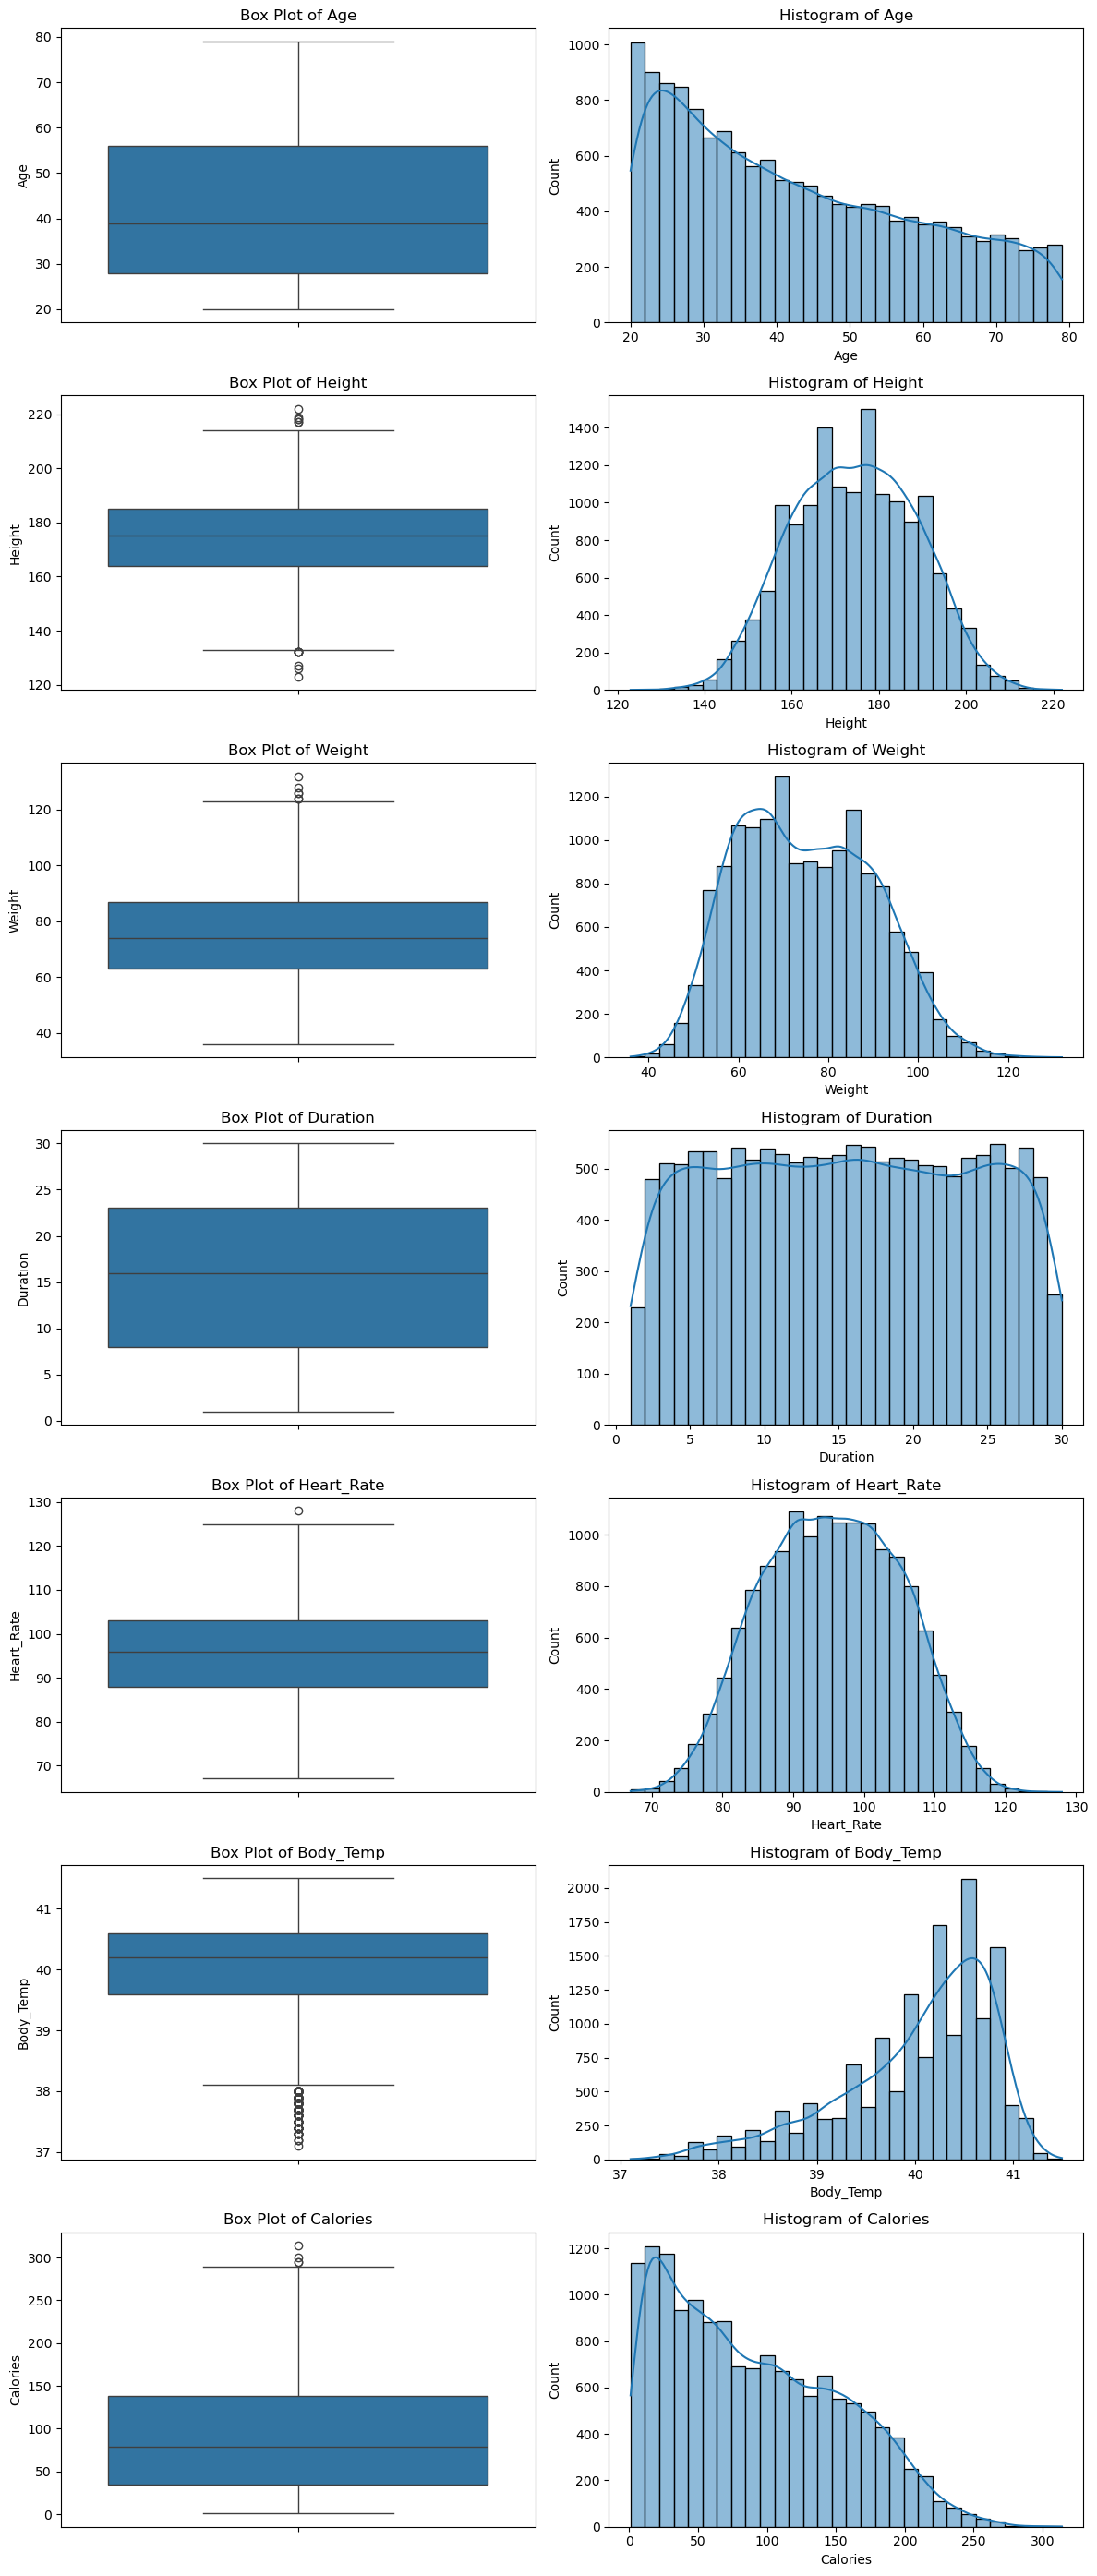

In [8]:
#Creating a side by side box plot and histogram of the numerical columns to check for outliers and their distribution
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(12, 4 * len(columns)))

for i, col in enumerate(columns):
  # Box plot
  sns.boxplot(y=df[col], ax=axes[i, 0])
  axes[i, 0].set_title(f'Box Plot of {col}')
  axes[i, 0].set_ylabel(col)

  # Histogram
  sns.histplot(df[col], ax=axes[i, 1], bins=30, kde=True)
  axes[i, 1].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

The height, weight, duration and heart rate columns are normally distributed while age and body temperature are non-normally distributed. Also, the target variable (Calories) is skewed. Hence, transformation will be needed to make all non-normally distributed columns to be normally distributed.

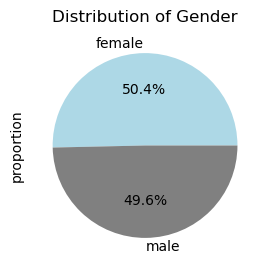

In [78]:
#Creating a piechart of the gender in the dataframe

fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)

df["Gender"].value_counts(normalize= True).plot(kind='pie', ax=ax, autopct='%1.1f%%',  title="Distribution of Gender", legend=False, fontsize=10, colors=['lightblue', 'gray'])
plt.show();

The proportion of the male and female gender in the dataset are almost equal. Hence, both genders are well represented in the dataset.

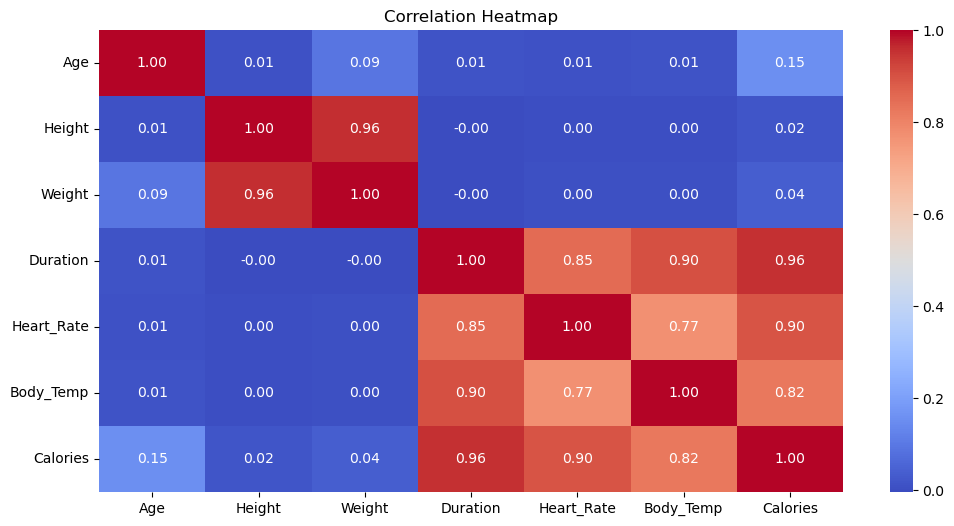

In [9]:
#Creating a heatmap to know the correlation of the features
plt.figure(figsize=(12, 6))
sns.heatmap(df[columns].corr(),fmt= '.2f', annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
#Obtaining the exact correlation co-efficient
df[columns].corr()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


This analysis revealed notable instances of multicollinearity among several of the variables, which could affect the regression model.

In particular:

1. **Height and Weight** exhibited a very high correlation coefficient of **0.958**.

2. **Duration and Body_Temp** had a similarly high correlation of **0.903**, while **Duration and Heart_Rate** showed a correlation of **0.853**.

Given the significant multicollinearity observed, steps may need to be taken to mitigate its impact. Potential solutions include removing one variable from each highly correlated pair (e.g., retaining `Height` while excluding `Weight`) or applying dimensionality reduction techniques like Principal Component Analysis (PCA) to combine these correlated variables.

**Capping of the Outliers**

In [11]:
# Interquartile range (IQR) capping for non-normally distributed columns: Age and Body_Temp
for col in ['Age', 'Body_Temp']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Cap values above and below bounds
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

from scipy.stats import zscore
# Z-score capping for normally distributed columns: Height, Weight, Duration, Heart_Rate
for col in ['Height', 'Weight', 'Duration', 'Heart_Rate']:
  z_scores = zscore(df[col])
  abs_z_scores = np.abs(z_scores)

  # Cap values above and below threshold using mean +- z_threshold * std
  z_threshold = 3
  df[col] = np.where(abs_z_scores > z_threshold, df[col].mean() + z_threshold * df[col].std(), df[col])
  df[col] = np.where(abs_z_scores > z_threshold, df[col].mean() - z_threshold * df[col].std(), df[col])


**Feature Construction**

In [12]:
 # Height is converted from cm to meters and creating a new feature; body mass index (BMI)

df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2


In [13]:
#Confirming the creation of the new column; BMI
df["BMI"].head()

0    26.038781
1    21.773842
2    24.655910
3    22.159109
4    24.456063
Name: BMI, dtype: float64

In [14]:
# Defining new age bins and corresponding labels for broader categories
age_bins = [0, 30, 60, 80]
age_labels = ['Young', 'Middle-aged', 'Old']

# Creating a new column 'Age Group' with these broader age categories
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [15]:
#Confirming the creation of the Age_Group column
df[['Age', 'Age_Group']].head()

,Age,Age_Group
0,68.0,Old
1,20.0,Young
2,69.0,Old
3,34.0,Middle-aged
4,27.0,Young


**Transformation of the target column; Calories**

In [43]:
#Creating a new column; log_calories which is the natural logarithm of the target column; calories
df['log_calories'] = np.log1p(df['Calories'])

#Creating a new column; Calories_sqrt which is the square root of the target column; calories
df['Calories_sqrt'] = np.sqrt(df['Calories'])

In [44]:
#Confirming the new columns have been added to the dataframe
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'Age_Group',
       'log_calories', 'Calories_sqrt'],
      dtype='object')

In [45]:
#Assigning columns 'log_calories' and  'Calories_sqrt' to a list named; columns
columns = ['log_calories', 'Calories_sqrt']

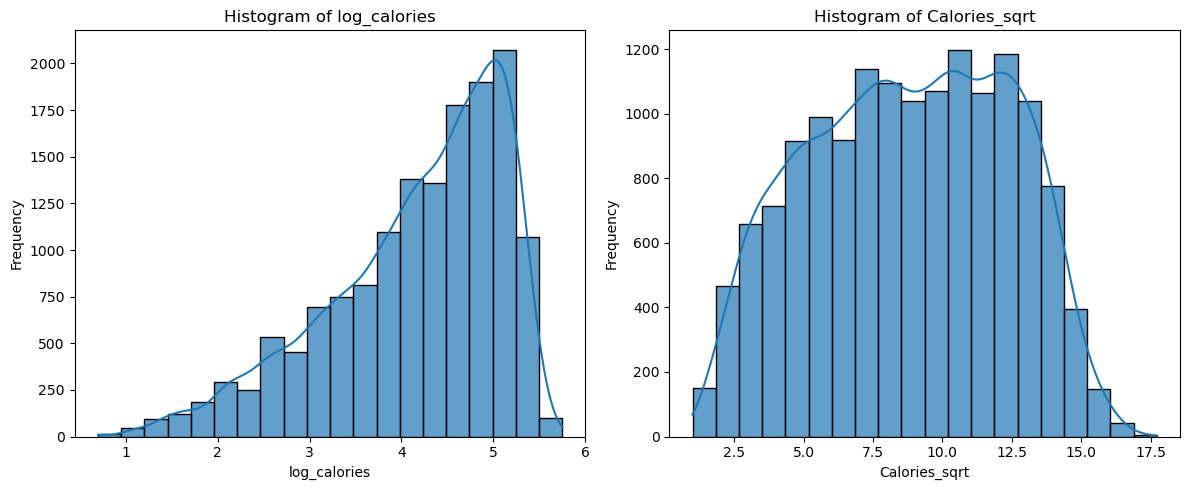

In [46]:
#Creating histograms of the 'log_calories' and  'Calories_sqrt' columns
plt.figure(figsize=(12, 5))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 2, i)  
    # Create subplots
    sns.histplot(df[col], bins=20, edgecolor='black', alpha=0.7, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The calories_sqrt column has a better distribution than log_calories. Hence, Calories_sqrt will be used as the target vector.

**Data Preparation**

In [47]:
#Creating the feature matrix; X and dropping leaky features and an irrelevant column; 'User_ID'
X = df.drop(['User_ID', 'Calories', 'log_calories', 'Calories_sqrt'], axis=1)

#Creating the target vector
y = df['Calories_sqrt']

**Data Splitting**

In [21]:
#Importing relevant libraries for data splitting and pre-processing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [22]:
#Dividing the dataset into training and test sets using a randomized split, setting the test_size to 20% and random_state to 42

train_inputs, test_inputs, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42)

**Encoding the Categorical Variables**

In [23]:
#Confirming the features in the training set
train_inputs.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'BMI', 'Age_Group'],
      dtype='object')

In [24]:
#Initializing One Hot Encoder and assigning it a variable name; encoder

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

In [25]:
#Fitting and transforming the categorical variables; 'Gender', 'Age_Group' for the training and test sets

train_inputs_encoded = encoder.fit_transform(train_inputs[['Gender', 'Age_Group']])

test_inputs_encoded = encoder.transform(test_inputs[['Gender', 'Age_Group']])

In [26]:
#Creating new dataframes with the encoded columns

train_inputs_encoded = pd.DataFrame(train_inputs_encoded, columns=encoder.get_feature_names_out(['Gender', 'Age_Group']))

test_inputs_encoded = pd.DataFrame(test_inputs_encoded, columns=encoder.get_feature_names_out(['Gender', 'Age_Group']))

In [27]:
#Dropping the original categorical columns and joining the encoded dataframe to the main training and test sets

train_inputs = train_inputs.drop(['Gender', 'Age_Group'], axis=1).join(train_inputs_encoded)

test_inputs = test_inputs.drop(['Gender', 'Age_Group'], axis=1).join(test_inputs_encoded)

**Feature Scaling**

In [28]:
#Initializing  the standard scaler
scaler = StandardScaler()

In [29]:
#Fitting and transforming the numerical columns in the training and test sets into the standard scaler

train_inputs[['Height', 'Weight']] = scaler.fit_transform(train_inputs[['Height', 'Weight']])
test_inputs[['Height', 'Weight']] = scaler.transform(test_inputs[['Height', 'Weight']])

train_inputs[['Duration', 'Heart_Rate', 'Body_Temp']] = scaler.fit_transform(train_inputs[['Duration', 'Heart_Rate', 'Body_Temp']])
test_inputs[['Duration', 'Heart_Rate', 'Body_Temp']] = scaler.transform(test_inputs[['Duration', 'Heart_Rate', 'Body_Temp']])

train_inputs[['Age']] = scaler.fit_transform(train_inputs[['Age']])
test_inputs[['Age']] = scaler.transform(test_inputs[['Age']])

**Principal Component Analysis (PCA)**

Applying the PCA function to strongly correlated features; 'Height', 'Weight'

In [30]:
#Importing PCA library
from sklearn.decomposition import PCA

In [31]:
# Setting the number of components to 1
pca_physical = PCA(n_components=1)
pca_exertion = PCA(n_components=1)

#Fitting and transforming
train_inputs_physical = pca_physical.fit_transform(train_inputs[['Height', 'Weight']])
test_inputs_physical = pca_physical.transform(test_inputs[['Height', 'Weight']])

In [32]:
train_inputs_exertion = pca_exertion.fit_transform(train_inputs[['Duration', 'Heart_Rate', 'Body_Temp']])
test_inputs_exertion = pca_exertion.transform(test_inputs[['Duration', 'Heart_Rate', 'Body_Temp']])

In [33]:
# Combining the transformed features and the categorical features
train_inputs_pca = np.hstack([train_inputs[['Age']].values, train_inputs_physical, train_inputs_exertion, train_inputs_encoded.values])
test_inputs_pca = np.hstack([test_inputs[['Age']].values, test_inputs_physical, test_inputs_exertion, test_inputs_encoded.values])

# Model Building and Evaluation

In [34]:
#Importing libraries required for the regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
#Creating a function for the evaluation of the models
def evaluate_models(models, train_inputs, train_target, test_inputs, test_target):

  model.fit(train_inputs, train_target)

  # Predict for train & test
  train_pred = model.predict(train_inputs)
  test_pred = model.predict(test_inputs)

  # Training Metrics
  train_metrics = {
      'MSE': mean_squared_error(train_target, train_pred),
      'RMSE': np.sqrt(mean_squared_error(train_target, train_pred)),
      'R2': r2_score(train_target, train_pred)
  }

  # Test Metrics
  test_metrics = {
      'MSE': mean_squared_error(test_target, test_pred),
      'RMSE': np.sqrt(mean_squared_error(test_target, test_pred)),
      'R2': r2_score(test_target, test_pred)
  }

  # return performance metrics
  return train_metrics, test_metrics

In [37]:
#Initializing the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

# Storing the results for each model
train_results = {}
test_results = {}

# Evaluating each model
for model_name, model in models.items():
  train_metrics, test_metrics = evaluate_models(model, train_inputs_pca, train_target, test_inputs_pca, test_target)
  train_results[model_name] = train_metrics
  test_results[model_name] = test_metrics
    
#Putting the train and test results into dataframes

train_results_df = pd.DataFrame(train_results).T
test_results_df = pd.DataFrame(test_results).T

In [38]:
train_results_df

,MSE,RMSE,R2
Linear Regression,0.297254,0.545210,0.976293
Random Forest,0.025152,0.158595,0.997994
Gradient Boosting,0.154208,0.392694,0.987701
XGBoost,0.087210,0.295313,0.993045
CatBoost,0.120938,0.347762,0.990355


In [39]:
test_results_df

,MSE,RMSE,R2
Linear Regression,0.283071,0.532044,0.978155
Random Forest,0.159718,0.399648,0.987674
Gradient Boosting,0.145848,0.381901,0.988745
XGBoost,0.156519,0.395625,0.987921
CatBoost,0.139054,0.372900,0.989269


### Saving the best performing model

In [40]:
#Rebuilding the best performing model; CatBoostRegressor
model = CatBoostRegressor(verbose=0)

#Fitting the model
model.fit(train_inputs_pca, train_target)

#Using the model to generate a series of predictions for the test_inputs
test_pred = model.predict(test_inputs_pca)

#Obtaining the accuracy score
score = model.score(test_inputs_pca, test_target)

score

0.9892689237602486

In [41]:
#Importing the library that will be used to save the best-performing model

import pickle

In [42]:
# Saving the best-performing model to a file named "model"
with open ("model", "wb") as f:
    pickle.dump(model, f)

## Model Deployment Using Streamlit

In [48]:
#Importing streamlit
import streamlit as st

In [83]:
#Creating a "make_predictions" function and  a web page with all the relevant columns of the ML model
def make_predictions(): 
    st.title("Calories_Burnt_Predictor")
    html_temp = """
    <div style="background:#025246 ;padding:10px">
    <h2 style="color:white;text-align:center;">Calories Burnt Predictor </h2>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html = True)
    
    Age = st.text_input("Age","0") 
    Gender = st.selectbox("Gender", ["Female","Male"])
    Height = st.text_input("Height","0") 
    Weight = st.text_input("Weight","0") 
    Heart_Rate = st.text_input("Heart_Rate","0") 
    Body_Temp = st.text_input('Body_Temp', "0") 
    
    #Creating a predict button and call predict from its click action
    if st.button("Predict"): 
        features = [['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]  
        data = {'Age': int(Age), 'Gender': Gender, 'Height': int(Height), 'Weight': int(Weight), 'Duration': int(Duration), 'Heart_Rate': int(Heart_Rate), 'Body_Temp': int(Body_Temp)}
        print(data)
        df=pd.DataFrame([list(data.values())], columns=['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'])
            
        features_list = df.values.tolist()      
        prediction = model.predict(features_list)
    
        output = int(prediction[0])
       
        st.success('The number of calories burnt is{}'.format(int))
      
if __name__=='__make_predictions__': 
    main()